In [39]:
import pandas as pd
import numpy as np

In [2]:
practice_data = pd.read_csv("data/GPsize.csv")
practice_address_data = pd.read_csv("data/T201912ADDR BNFT.csv", names = ["date", "Code", "Name", "Name2", "Add", "Loc", "Place", "Postcode"])
pollution_data = pd.read_csv("data/mappm252019g.csv")
prescription_data = pd.read_csv("data/T201912PDPI BNFT.csv")

In [3]:
prescription_data.rename(columns = {"PRACTICE":"Code"}, inplace = True)
prescription_data = prescription_data.merge(practice_data.drop(columns=["Practice"]))

In [4]:
import pgeocode
from convertbng.util import convert_bng
import tqdm

practice_address_data = practice_address_data.drop(columns=["date", "Name", "Name2", "Add", "Loc", "Place"])

nomi = pgeocode.Nominatim('gb')
practice_address_data["x"], practice_address_data["y"] = 0, 0


for i in tqdm.tqdm(range(len(practice_address_data))):
    postcode = practice_address_data["Postcode"][i]
    if pd.isnull(postcode): continue
    loc = nomi.query_postal_code(practice_address_data["Postcode"][i])
    x,y = convert_bng(loc["longitude"], loc["latitude"])
    if pd.isnull(x) or pd.isnull(y): continue
    practice_address_data["x"][i] = int(round(x[0], -3)) + 500
    practice_address_data["y"][i] = int(round(y[0], -3)) + 500
    
prescription_data = prescription_data.merge(practice_address_data)

  0%|          | 0/9324 [00:00<?, ?it/s]<ipython-input-4-898e753c856a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_address_data["x"][i] = int(round(x[0], -3)) + 500
<ipython-input-4-898e753c856a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_address_data["y"][i] = int(round(y[0], -3)) + 500
100%|██████████| 9324/9324 [00:33<00:00, 282.01it/s]


In [5]:
pd.isnull(practice_address_data["Postcode"][4807])

True

In [6]:
prescription_data["Total List Size"] = prescription_data["Total List Size"].str.replace(',', '').astype(float)
prescription_data

,SHA,PCT,Code,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Total List Size,Postcode,x,y
0,Q44,01C,N81002,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1,2.99,2.79,500.0,201912,13040.0,SK9 1PA,385500,381500
1,Q44,01C,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,5,26.11,24.53,2550.0,201912,13040.0,SK9 1PA,385500,381500
2,Q44,01C,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.87,60.0,201912,13040.0,SK9 1PA,385500,381500
3,Q44,01C,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,7.11,6.62,600.0,201912,13040.0,SK9 1PA,385500,381500
4,Q44,01C,N81002,0101021B0BEADAJ,Gaviscon Infant_Oral Pdr Sach,3,33.74,31.40,210.0,201912,13040.0,SK9 1PA,385500,381500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154947,Q70,99M,J82630,23804708006,Smith & Nephew_Proshield Foam & Spy Skin Clean...,4,26.44,24.61,4.0,201912,5302.0,GU14 6DH,484500,156500
9154948,Q70,99M,J82630,23804708007,Smith & Nephew_Proshield Plus Skin Prote 115g,3,29.82,27.74,3.0,201912,5302.0,GU14 6DH,484500,156500
9154949,Q70,99M,J82630,23854808504,ConvaTec_Stomahesive Seal 48mm x 3mm,1,38.42,35.71,20.0,201912,5302.0,GU14 6DH,484500,156500
9154950,Q70,99M,J82630,23944809487,ConvaTec_Combihesive Natura Flx Flng 45mm,1,33.82,31.45,10.0,201912,5302.0,GU14 6DH,484500,156500


In [7]:
prescription_data["RATE"] = prescription_data["QUANTITY"] / prescription_data["Total List Size"]

In [59]:
prescription_data = prescription_data.merge(pollution_data)
prescription_data = prescription_data.replace('MISSING',np.NaN)
prescription_data["pm252019g"] = pd.to_numeric(prescription_data["pm252019g"], downcast="float")

ValueError: You are trying to merge on float32 and object columns. If you wish to proceed you should use pd.concat

In [62]:
prescription_data["BNF CHAPTER"] = prescription_data["BNF CODE"].astype(str).str[0:2]

In [63]:
prescription_data

,SHA,PCT,Code,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,Total List Size,Postcode,x,y,RATE,ukgridcode,pm252019g,BNF CHAPTER
0,Q44,01C,N81002,0101010G0BCABAB,Mucogel_Susp 195mg/220mg/5ml S/F,1,2.99,2.79,500.0,201912,13040.0,SK9 1PA,385500,381500,0.038344,633816,8.459240,01
1,Q44,01C,N81002,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,5,26.11,24.53,2550.0,201912,13040.0,SK9 1PA,385500,381500,0.195552,633816,8.459240,01
2,Q44,01C,N81002,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,3.07,2.87,60.0,201912,13040.0,SK9 1PA,385500,381500,0.004601,633816,8.459240,01
3,Q44,01C,N81002,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,1,7.11,6.62,600.0,201912,13040.0,SK9 1PA,385500,381500,0.046012,633816,8.459240,01
4,Q44,01C,N81002,0101021B0BEADAJ,Gaviscon Infant_Oral Pdr Sach,3,33.74,31.40,210.0,201912,13040.0,SK9 1PA,385500,381500,0.016104,633816,8.459240,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117201,Q70,99M,J82142,23920109202,Hollister_Urost Drain Tube Adapt,1,72.63,67.51,30.0,201912,9714.0,GU12 4DN,489500,153500,0.003088,791240,9.208259,23
9117202,Q70,99M,J82142,23941010101,Coloplast_SenSura Mio Concave Click B/Plt 50mm...,1,40.48,37.63,10.0,201912,9714.0,GU12 4DN,489500,153500,0.001029,791240,9.208259,23
9117203,Q70,99M,J82142,23960109725,Hollister_Moderma Flex Urost Bag Transpt 15-55mm,1,209.64,194.86,40.0,201912,9714.0,GU12 4DN,489500,153500,0.004118,791240,9.208259,23
9117204,Q70,99M,J82142,23960109781,Hollister_Moderma Flex Flextend Urost Bag Tran...,1,193.59,179.94,30.0,201912,9714.0,GU12 4DN,489500,153500,0.003088,791240,9.208259,23


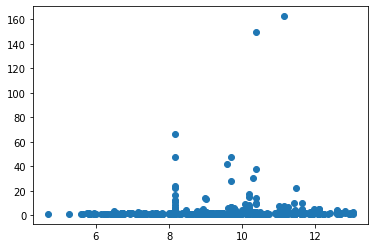

In [68]:
from matplotlib import pyplot
asthma = prescription_data.loc[prescription_data["BNF CHAPTER"] == "03"]
asthma = asthma.loc[prescription_data["RATE"] > 1]
pyplot.scatter(asthma['pm252019g'].values, asthma['RATE'].values)

In [69]:
import scipy.stats
asthma = asthma.dropna()
scipy.stats.pearsonr(asthma['pm252019g'].values, asthma['RATE'].values)

(0.05574152170699907, 0.20011196680809204)

In [50]:
asthma['pm252019g'].values


array([8.45924 , 8.45924 , 8.45924 , ..., 9.228472, 9.228472, 9.208259],
      dtype=float32)

In [10]:
practice_data

,Practice,Code,Total List Size
0,ABBEY MEDICAL CENTRE,F82625,"6,929.00"
1,AURORA MEDCARE,F82042,"9,097.00"
2,BARKING MEDICAL GROUP PRACTICE,F82018,"11,357.00"
3,DR A ARIF,F86040,"4,965.00"
4,DR A MOGHAL'S PRACTICE,F82677,"6,941.00"
...,...,...,...
6823,WEST END SURGERY,J82008,"7,782.00"
6824,WEST MEON SURGERY,J82036,"2,682.00"
6825,WHITCHURCH SURGERY,J82214,"9,118.00"
6826,WICKHAM SURGERY,J82034,"12,991.00"


In [57]:
prescription_data["BNF CODE"][6266000]

'0303020G0AAABAB'